In [1]:
import pandas as pd

In [2]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [3]:
# header=0.指定行数作为列名
# index_col=0,行索引所在列的编号
data = pd.read_csv('pollution.csv', index_col=0)

In [4]:
print(data.shape)
data.head()

(43800, 8)


,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [5]:
values = data.values

In [6]:
values

array([[129.0, -16, -4.0, ..., 1.79, 0, 0],
       [148.0, -15, -4.0, ..., 2.68, 0, 0],
       [159.0, -11, -5.0, ..., 3.57, 0, 0],
       ...,
       [10.0, -22, -3.0, ..., 242.7, 0, 0],
       [8.0, -22, -4.0, ..., 246.72, 0, 0],
       [12.0, -21, -3.0, ..., 249.85, 0, 0]], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
# Encode labels with value between 0 and n_classes-1.
encoder = LabelEncoder()

In [9]:
# integer encode direction
values[:,4] = encoder.fit_transform(values[:,4])

In [10]:
# 把所有值变成float格式
values = values.astype('float32')

In [11]:
values

array([[129.  , -16.  ,  -4.  , ...,   1.79,   0.  ,   0.  ],
       [148.  , -15.  ,  -4.  , ...,   2.68,   0.  ,   0.  ],
       [159.  , -11.  ,  -5.  , ...,   3.57,   0.  ,   0.  ],
       ...,
       [ 10.  , -22.  ,  -3.  , ..., 242.7 ,   0.  ,   0.  ],
       [  8.  , -22.  ,  -4.  , ..., 246.72,   0.  ,   0.  ],
       [ 12.  , -21.  ,  -3.  , ..., 249.85,   0.  ,   0.  ]],
      dtype=float32)

In [12]:
# 归一化，把数据归一化到统一的区间中， 默认为【0,1】
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
scaled_value = scaler.fit_transform(values)

In [15]:
# frame as supervised learning
reframed = series_to_supervised(scaled_value, 1, 1)

In [16]:
print(reframed.shape)
reframed.head()

(43799, 16)


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658,0.485294,0.213115,0.563637,0.666667,0.011433,0.111111,0.0


In [17]:
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)

In [18]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658


### 运行示例打印转换后的数据集的前5行。我们可以看到8个输入变量（输入序列）和1个输出变量（当前小时的污染水平）。

___

## 构造模型

### 首先将数据集划分为训练集和测试集。为了加速模型的训练，我们利用第一年数据进行训练，然后利用剩下的4年进行评估

In [19]:
values = reframed.values

In [20]:
# split into train and test sets
n_train_hours = 365*24*2
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

In [21]:
# split into inputs and outputs
train_x = train[:, :-1]
train_y = train[:, -1]
test_x = test[:, :-1]
test_y = test[:, -1]

In [22]:
print(train_x.shape)
print(test_x.shape)

(17520, 8)
(26279, 8)


In [23]:
# 转换为3维特征向量 [samples(样本个数), timesteps(时间距离), features(特征值)]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(17520, 1, 8) (17520,) (26279, 1, 8) (26279,)


___

### 搭建LSTM神经网络

### LSTM模型中，隐藏层50个神经元，输出层1个神经元（回归问题），输入变量是一个时间步(t-1)的特征，损失函数采用Mean Absolute Error(MAE)，优化算法采用Adam，模型采用50个epochs，并且每个batch大小为72

### 最后，在fit()函数中设置validation_data参数，记录训练集和测试集的损失，并在完成训练和测试后绘制损失图像

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.
F:\python\Anaconda3\envs\tensorFLow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
F:\python\Anaconda3\envs\tensorFLow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
F:\python\Anaconda3\envs\tensorFLow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
F:\python\Anaconda3\envs\tensorFLow

In [25]:
model = Sequential()
# LSTM 50 个神经元
model.add(LSTM(60, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dense(1))
# 编译 模型
model.compile(loss='mae', optimizer='adam')

In [26]:
model.summary()
# 展示模型的摘要信息

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60)                16560     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 61        
Total params: 16,621
Trainable params: 16,621
Non-trainable params: 0
_________________________________________________________________


In [27]:
"""
x: Numpy array of training data
y: Numpy array of target(label) data
batch_size: Integer or `None`.
                Number of samples per gradient update.
                If unspecified, `batch_size` will default to 32.
epochs: Integer. Number of epochs to train the model.
                An epoch is an iteration over the entire `x` and `y`
                data provided.
                Note that in conjunction with `initial_epoch`,
                `epochs` is to be understood as "final epoch".
                The model is not trained for a number of iterations
                given by `epochs`, but merely until the epoch
                of index `epochs` is reached.
verbose: Integer. 0, 1, or 2. Verbosity mode.
                0 = silent, 1 = progress bar, 2 = one line per epoch.
validation_data: tuple `(x_val, y_val)` or tuple
                `(x_val, y_val, val_sample_weights)` on which to evaluate
                the loss and any model metrics at the end of each epoch.
                The model will not be trained on this data.
                `validation_data` will override `validation_split`.
shuffle: Boolean (whether to shuffle the training data
                before each epoch) or str (for 'batch').
                'batch' is a special option for dealing with the
                limitations of HDF5 data; it shuffles in batch-sized chunks.
                Has no effect when `steps_per_epoch` is not `None`.

"""
history = model.fit(x=train_x, y=train_y, batch_size=72, epochs=20, verbose=2, validation_split=0.2, shuffle=True)

Train on 14016 samples, validate on 3504 samples
Epoch 1/20
 - 6s - loss: 0.0445 - val_loss: 0.0200
Epoch 2/20
 - 1s - loss: 0.0146 - val_loss: 0.0152
Epoch 3/20
 - 1s - loss: 0.0141 - val_loss: 0.0149
Epoch 4/20
 - 1s - loss: 0.0139 - val_loss: 0.0150
Epoch 5/20
 - 1s - loss: 0.0140 - val_loss: 0.0151
Epoch 6/20
 - 1s - loss: 0.0138 - val_loss: 0.0148
Epoch 7/20
 - 1s - loss: 0.0137 - val_loss: 0.0149
Epoch 8/20
 - 1s - loss: 0.0137 - val_loss: 0.0149
Epoch 9/20
 - 1s - loss: 0.0137 - val_loss: 0.0150
Epoch 10/20
 - 1s - loss: 0.0140 - val_loss: 0.0149
Epoch 11/20
 - 1s - loss: 0.0138 - val_loss: 0.0149
Epoch 12/20
 - 1s - loss: 0.0137 - val_loss: 0.0148
Epoch 13/20
 - 1s - loss: 0.0138 - val_loss: 0.0149
Epoch 14/20
 - 1s - loss: 0.0136 - val_loss: 0.0147
Epoch 15/20
 - 1s - loss: 0.0137 - val_loss: 0.0150
Epoch 16/20
 - 1s - loss: 0.0137 - val_loss: 0.0148
Epoch 17/20
 - 1s - loss: 0.0137 - val_loss: 0.0147
Epoch 18/20
 - 1s - loss: 0.0136 - val_loss: 0.0150
Epoch 19/20
 - 1s - loss

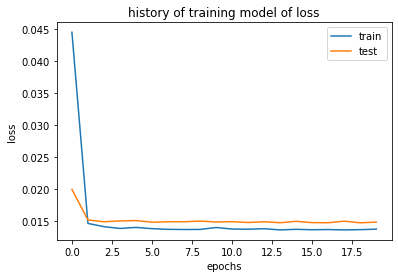

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('history of training model of loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [29]:
score = model.evaluate(test_x, test_y, verbose=1)

26279/26279 [==============================] - 2s 91us/step


In [32]:
score

0.013026711762073111

___

### 模型效果评估

In [33]:
# 数组拼接
from numpy import concatenate
from math import sqrt

In [34]:
# 预测测试集
yhat = model.predict(test_x)

In [35]:
print("prediction length: ",len(yhat))
print(yhat)

prediction length:  26279
[[0.11647336]
 [0.09942281]
 [0.08132758]
 ...
 [0.01101083]
 [0.01100309]
 [0.00903544]]


In [36]:
# 把测试集重新改为原先的形状
test_x = test_x.reshape(test_x.shape[0], test_x.shape[2])

In [37]:
# 反转回原始数据
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_x[:,1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape(len(test_y), 1)
inv_y = concatenate((test_y, test_x[:,1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]

In [38]:
print("预测值：",inv_yhat[:10])
print('=======')
print("原值：",inv_y[:10])

预测值： [115.77453   98.82627   80.839615  89.87483   88.892426  99.90683
 100.93466  103.30377  107.34292  133.00398 ]
原值： [ 97.  79.  88.  87.  98.  99. 100. 104. 131. 134.]


In [39]:
from sklearn.metrics import mean_squared_error
# 均方误差
"""
计算均方误差回归损失
格式：sklearn.metrics.mean_squared_error(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)
参数：
    y_true：真实值。
    y_pred：预测值。
    sample_weight：样本权值。
    multioutput：多维输入输出，默认为’uniform_average’，计算所有元素的均方误差，返回为一个标量；也可选‘raw_values’，
        计算对应列的均方误差，返回一个与列数相等的一维数组。
"""
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 26.280


In [40]:
len(inv_yhat)

26279